step 0, clusters move: [0.1649561149418255, 0.3600077205787108]
step 1, clusters move: [0.22014171305624555, 0.22334876253680938]
step 2, clusters move: [0.066669267461226, 0.06666926746122605]
step 3, clusters move: [0.0, 0.0]


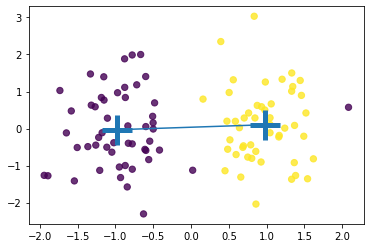

In [78]:
# kMeans custom implementation
import pickle
import numpy as np
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt

with open ('clustering.pkl', 'rb') as f:
    data_clustering=pickle.load(f)
X=np.array(data_clustering['X'])
Y=np.array(data_clustering['Y'])

def random_centroids_selection(X, n, k):
    """Randon initialize center of cluster"""
    result = []
    for obj_id in np.random.randint(0, n, size=k):
        result.append(X[obj_id, :])
    return result

def eval_weight_evolution(centroid_objects_prev, centroid_objects, k):
    """Evaluate of centroids move durind one step"""
    result = []
    for i in range(k):
        dist = distance.euclidean(
            centroid_objects_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
    return result

def eval_centroids(X, k, cluster_lables):
    """Evaluate new cwntroids with avg coord"""
    result = []
    for i in range(k):
        new_centroid = X[cluster_lables==i].mean(axis=0)
        result.append(new_centroid)
    return result

def eval_cluster_lables(X, centroid_objects):
    """Evaluate class labels"""
    cluster_distance = euclidean_distances(X, centroid_objects)
    cluster_lables = cluster_distance.argmin(axis=1)
    return cluster_lables

def k_means(X:np.array, k: int=2, eps: float=0.001, num_iteration: int=10) -> np.array:
    """kMeans
    :param X: train set
    :param k: clusters number
    """
    try:
        n, m = X.shape
    except ValueError:
        print("Train set should be (n,m) dimensional where m is size of set")
    centroid_objects = random_centroids_selection(X, n, k)
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    while sum(weight_evolution[i] > eps for i in range(k))!=0 and step < num_iteration:
        centroid_objects_prev = centroid_objects.copy()
        cluster_lables = eval_cluster_lables(X, centroid_objects)
        centroid_objects = eval_centroids(X, k, cluster_lables)
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print("step %s, clusters move: %s" % (step, weight_evolution))
        step += 1
    return np.vstack(centroid_objects), cluster_lables
    

centroids, labels = k_means(X, k=2, num_iteration=10)

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.plot(centroids[:, 0], centroids[:, 1], marker='+', mew=5, ms=30)
plt.show()